This code is referenced from the following repository:
https://github.com/XiuzeZhou/RUL

D. Chen, W. Hong and X. Zhou, "Transformer Network for Remaining Useful Life Prediction of Lithium-Ion Batteries," in IEEE Access, vol. 10, pp. 19621-19628, 2022.

In [1]:
import scipy.io
import numpy as np
from datetime import datetime

# convert str to datatime
def convert_to_time(hmm):
    year, month, day, hour, minute, second = int(hmm[0]), int(hmm[1]), int(hmm[2]), int(hmm[3]), int(hmm[4]), int(hmm[5])
    return datetime(year=year, month=month, day=day, hour=hour, minute=minute, second=second)


# load .mat data
def loadMat(matfile):
    data = scipy.io.loadmat(matfile)
    filename = matfile.split("/")[-1].split(".")[0]
    col = data[filename]
    col = col[0][0][0][0]
    size = col.shape[0]

    data = []
    for i in range(size):
        k = list(col[i][3][0].dtype.fields.keys())
        d1, d2 = {}, {}
        if str(col[i][0][0]) != 'impedance':
            for j in range(len(k)):
                t = col[i][3][0][0][j][0];
                l = [t[m] for m in range(len(t))]
                d2[k[j]] = l
        d1['type'], d1['temp'], d1['time'], d1['data'] = str(col[i][0][0]), int(col[i][1][0]), str(convert_to_time(col[i][2][0])), d2
        data.append(d1)

    return data


# get capacity data
def getBatteryCapacity(Battery):
    cycle, capacity = [], []
    i = 1
    for Bat in Battery:
        if Bat['type'] == 'discharge':
            capacity.append(Bat['data']['Capacity'][0])
            cycle.append(i)
            i += 1
    return [cycle, capacity]


# get the charge data of a battery
def getBatteryValues(Battery, Type='charge'):
    data=[]
    for Bat in Battery:
        if Bat['type'] == Type:
            data.append(Bat['data'])
    return data

In [4]:
Battery_list = ['B0005', 'B0006', 'B0007', 'B0018']

Battery = {}
for name in Battery_list:
    print('Load Dataset ' + name + '.mat ...')
    path = name + '.mat'
    data = loadMat(path)
    Battery[name] = getBatteryCapacity(data)
np.save('NASA.npy', Battery)

Load Dataset B0005.mat ...


C:\Users\cxled\AppData\Local\Temp\ipykernel_20464\2486514366.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  d1['type'], d1['temp'], d1['time'], d1['data'] = str(col[i][0][0]), int(col[i][1][0]), str(convert_to_time(col[i][2][0])), d2


Load Dataset B0006.mat ...
Load Dataset B0007.mat ...
Load Dataset B0018.mat ...


### If you want to save as a CSV file, run the following code:

In [17]:
import os
import pandas as pd

# data_save_path = 'csv'
# if not os.path.exists(data_save_path):
#     os.makedirs(data_save_path)

for i in range(len(Battery_list)):
    name = Battery_list[i]
    df_result = Battery[name]
    df_result = pd.DataFrame(np.array(df_result).transpose(), columns=['cycle', 'capacity'])
    df_result.to_csv(name + '.csv', index=False)
    print('Save Dataset ' + name + '.csv ...')

Save Dataset B0005.csv ...
Save Dataset B0006.csv ...
Save Dataset B0007.csv ...
Save Dataset B0018.csv ...


### If the above read fails, please load the .npy file.

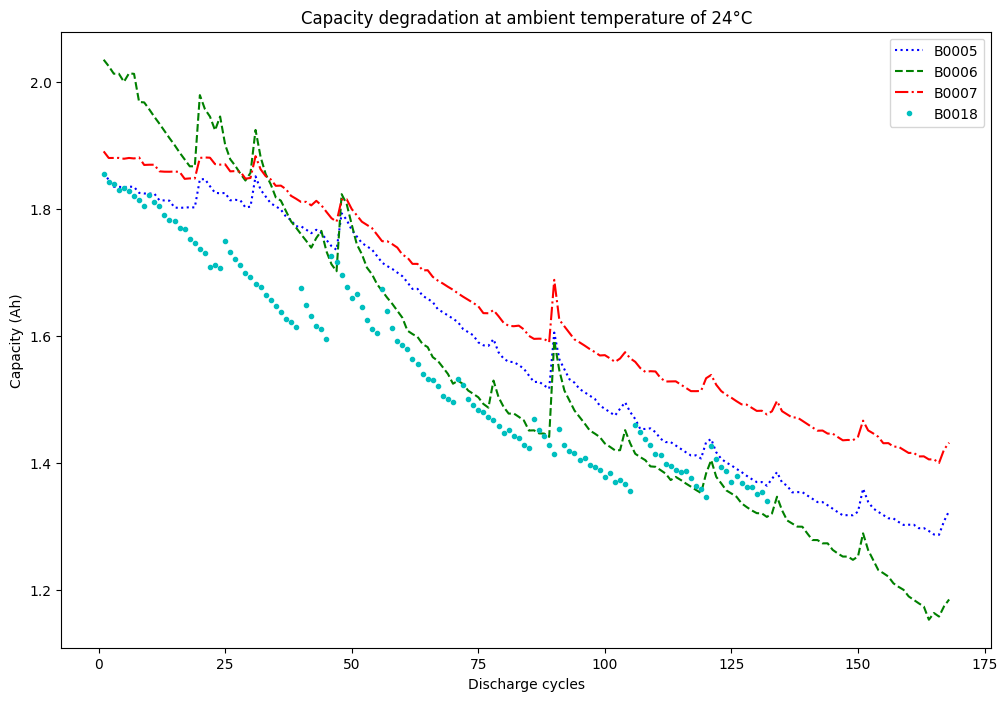

In [5]:
import numpy as np
import matplotlib.pyplot as plt

Battery_list = ['B0005', 'B0006', 'B0007', 'B0018']
Battery = np.load('NASA.npy', allow_pickle=True)
Battery = Battery.item()

fig, ax = plt.subplots(1, figsize=(12, 8))
color_list = ['b:', 'g--', 'r-.', 'c.']
c = 0
for name,color in zip(Battery_list, color_list):
    df_result = Battery[name]
    ax.plot(df_result[0], df_result[1], color, label=name)
ax.set(xlabel='Discharge cycles', ylabel='Capacity (Ah)', title='Capacity degradation at ambient temperature of 24°C')
plt.legend()